In [41]:
import requests
import torch
from PIL import Image
from torchvision import transforms
from numpy import argmax
from IPython import display

In [42]:
INFERENCE_ENDPOINT = "https://cats-vs-dogs-jairamir-rhoai-webinar-multimodel.apps.rhods-internal.61tk.p1.openshiftapps.com/v2/models/cats-vs-dogs/infer"

In [43]:
# Define the transformations (same as used during training)
transform = transforms.Compose([
    transforms.Resize((50, 50)),  # Resize the image
    transforms.ToTensor(),          # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])


def make_request(tensor: torch.Tensor):
    payload = {
        "inputs": [
            {
                # The ONNX model requires this name
                "name": "input.1",
                "shape": [1, 3, 50, 50],
                "datatype": "FP32",
                "data": tensor.tolist()
            }
        ]
    }

    response = requests.post(INFERENCE_ENDPOINT, json=payload)
    return response.json()



def predict_image(image_path):
    # Open the image file
    image = Image.open(image_path).convert('RGB')

    # Preprocess the image
    tensor = transform(image).unsqueeze(0)  # Add batch dimension

    response = make_request(tensor)

    labels = ['Cat', 'Dog']
    model_output = response['outputs'][0]['data']
    classification_result = labels[argmax(model_output)]
    return classification_result

Cat


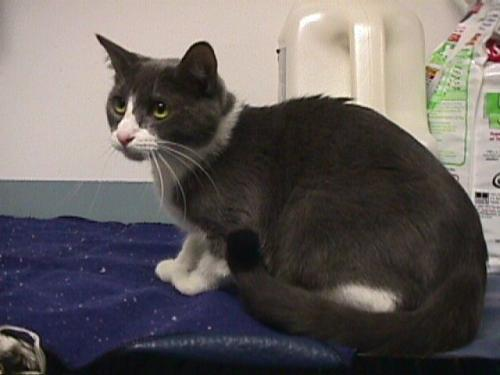

In [45]:
CAT_IMAGE = "test.jpg"
print(predict_image(CAT_IMAGE))
display.Image(CAT_IMAGE)

Dog


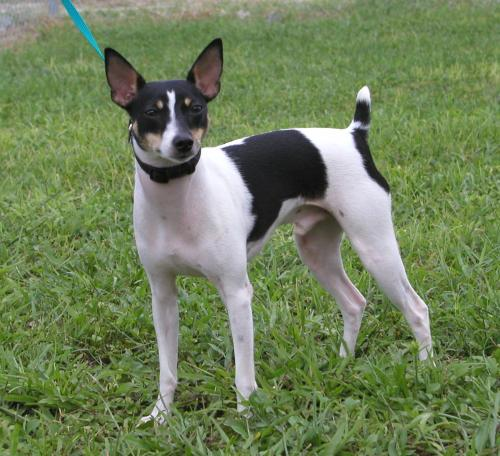

In [46]:
DOG_IMAGE = "dog.jpg"
print(predict_image(DOG_IMAGE))
display.Image(DOG_IMAGE)